# 4.Learning of Neural Network
## mean squared error
$$ E = \frac{1}{2} \sum_{k}(y_k -t_k)^2 $$

In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

## cross entropy error
$$ E = -\sum_{k}t_k\log y_k $$

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7 # avoid "np.log(0) = -inf"
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [3]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [4]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(batch_mask)
print(x_batch)
print(t_batch)

[23197 56111 45903  8980   999 52678 43376 37922 24208 29649]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


In [5]:
def cross_entropy_error(y, t): # one-hot
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [6]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size # consider only correct label    

## numerical differentiation

In [7]:
# bad example
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

print(1e-50)
print(np.float32(1e-50)) # rounding error

1e-50
0.0


In [8]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

<function matplotlib.pyplot.show>

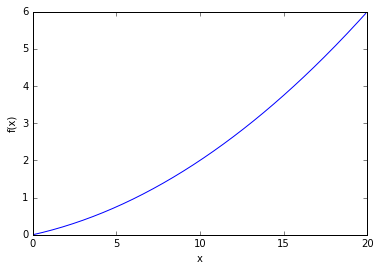

In [10]:
import matplotlib.pylab as plt
%matplotlib inline

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show

In [11]:
print(numerical_diff(function_1, 5)) # f'(5) = 0.2
print(numerical_diff(function_1, 10)) # f'(10) = 0.3

0.1999999999990898
0.2999999999986347


In [12]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    return lambda t: d*(t - x) + f(x)

0.1999999999990898


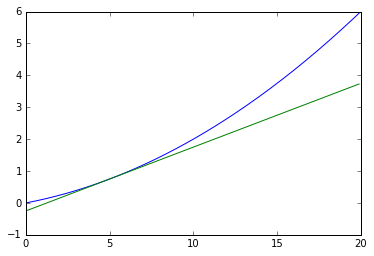

In [13]:
tf = tangent_line(function_1, 5)
y2 = tf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [14]:
def function_2(x):
    return x[0]**2 + x[1]**2

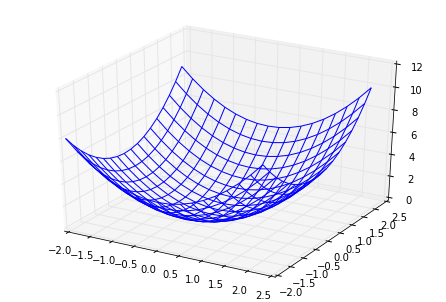

In [15]:
from mpl_toolkits.mplot3d import Axes3D
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
Z = function_2(np.array([X,Y]))
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)
plt.show()

In [16]:
# compute partial derivative of f with respect to x0 
# at (x0, x1) = (3, 4)
def function_tmp1(x0):
    return x0*x0 + 4.0**2
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [17]:
# compute partial derivative of f with respect to x1 
# at (x0, x1) = (3, 4)
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [18]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        # compute f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        #compute f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        # compute partial derivative with respect to x_idx
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

def numerical_gradient(f,X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad

numerical_gradient(function_2, np.array([[3.0, 4.0],[1.0,2.0]]))
#_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([[ 6.,  8.],
       [ 2.,  4.]])

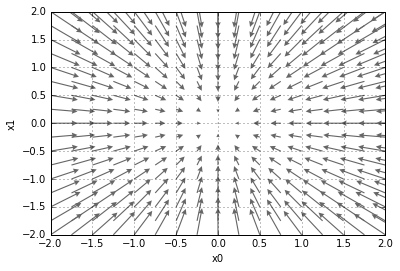

In [19]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]).T )

plt.figure()
plt.quiver(X,Y,-grad[:,0],-grad[:,1],angles="xy",color="#666666",headwidth=5,scale=50)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

## gradient descent method

In [20]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

[ -6.11110793e-10   8.14814391e-10]


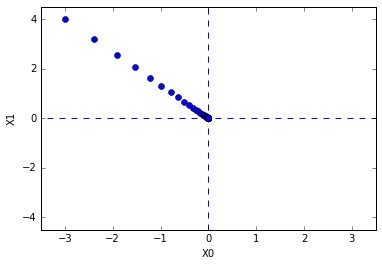

In [21]:
init_x = np.array([-3.0,4.0])
#lr = 1e-3
lr = 0.1
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=100)
print(x)
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [22]:
from common.functions import softmax,cross_entropy_error
#from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # Gaussian noise
    def predict(self,x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [23]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
t = np.array([0,0,1])
loss = net.loss(x,t)
print(loss)

[[-0.92385103  0.22391715  1.00375695]
 [-0.56862181 -1.2312847  -1.35621024]]
[-1.06607024 -0.97380595 -0.61833505]
0.850115556953


In [24]:
def f(W):
    return net.loss(x,t)
#f = lambda w: net.loss(x,t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.1638709   0.17970978 -0.34358067]
 [ 0.24580635  0.26956467 -0.51537101]]


In [25]:
from common.functions import *

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # initialize weight
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
        
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        return grads
    
    def gradient(self, x, t): # see the next chapter for ditails
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [26]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params["W1"].shape

(784, 100)

In [27]:
x = np.random.rand(100,784)
y = net.predict(x)
t = np.random.rand(100,10)

In [28]:
grads = net.numerical_gradient(x, t) # need a lot of time

In [29]:
grads = net.gradient(x,t) # fast method

train acc, test acc |0.0986333333333,0.0958
train acc, test acc |0.80385,0.8038
train acc, test acc |0.875483333333,0.8791
train acc, test acc |0.897966666667,0.9024
train acc, test acc |0.908266666667,0.9117
train acc, test acc |0.914183333333,0.9157
train acc, test acc |0.9197,0.9217
train acc, test acc |0.923983333333,0.9264
train acc, test acc |0.927683333333,0.9294
train acc, test acc |0.931133333333,0.9313
train acc, test acc |0.934216666667,0.9346
train acc, test acc |0.9373,0.9371
train acc, test acc |0.9393,0.9389
train acc, test acc |0.9413,0.9406
train acc, test acc |0.943683333333,0.9421
train acc, test acc |0.9458,0.9451
train acc, test acc |0.94715,0.9467


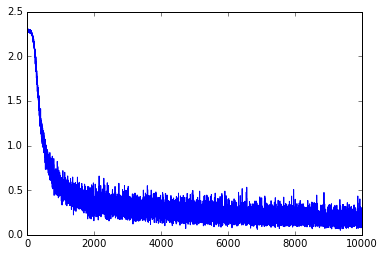

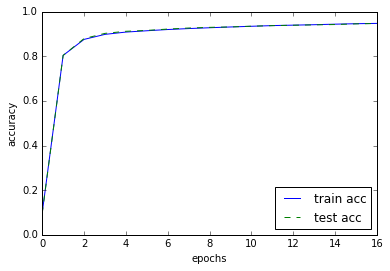

In [31]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# hyper parameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# list for record
train_loss_list=[]
train_acc_list=[]
test_acc_list=[]
iter_per_epoch = max(int(train_size / batch_size), 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # get a mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # compute gradients
    grad = network.gradient(x_batch, t_batch)
    
    # update parameters
    for key in network.params.keys():
        network.params[key] -= learning_rate * grad[key]
        
    # record the process of learning
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # compute accuracy per an epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |" + str(train_acc)+ "," + str(test_acc))

plt.plot(np.arange(iters_num),train_loss_list)
plt.show()

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()